In [ ]:
# **Choropleth**

This notebook demonstrates a choropleth, a thematic map in which polygon areas are coloured to represent a value. The notebook loads a polygon GeoJSON dataset and produces a choropleth visualisation.

The key parameters need to be edited in the Parameters section below, in particular for selecting the data of interest. 

In [1]:
#  Load the required libraries

library(sf)
library(ggplot2)
library(classInt)

Linking to GEOS 3.8.0, GDAL 3.0.4, PROJ 6.3.0



##  Parameters

Edit the key parameters here; the dataset, the varaible of interest and the number of categories for the variable to be classified into. 

In [12]:
#  Insert the dataset name and variable of interest

## Dataset
dataset.param <- "CancerMortality-1614033420629.geojson"

## Variable of Interest
variable.param <- "all_canc_rate"

## Number of Categories
intervals.param <- 6

In [ ]:
## Load Dataset

In [13]:
#  The data are loaded here and converted to an sf dataframe.

setwd("/home/jovyan/aurin")                                                    # Set the working directory
getwd()
dataset.sf <-  st_read(paste("data/choropleth/", dataset.param, sep = ""))                # Load the GeoJSON dataset

[1] "/home/jovyan/aurin"

Reading layer `CancerMortality-1614033420629' from data source `/home/jovyan/aurin/data/CancerMortality-1614033420629.geojson' using driver `GeoJSON'
Simple feature collection with 40 features and 10 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: 144.3336 ymin: -38.50299 xmax: 145.8784 ymax: -37.1751
epsg (SRID):    4283
proj4string:    +proj=longlat +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +no_defs


## Prepare Data

This cell creates a new variable in the dataset that is a categorisation of the variable of interest into a series of intervals.

In [14]:
# Generate a list of intervals
cint <- classIntervals(dataset.sf[[variable.param]], intervals.param,
                       style = "quantile")                                     # Set the type of classifcation, e.g. "equal" for equal intervals

print(cint)
                                                                        
# Create the categorised variable according to the intervals generated above 
dataset.sf$choropleth_cat <- cut(dataset.sf[[variable.param]], 
                                 breaks = data.frame(cint[2])[,1],
                                 include.lowest = TRUE,
                                 dig.lab = 7)                                  # dig.lab sets the number of digits in the label before scientific notation is used

style: quantile
  one of 575,757 possible partitions of this variable into 6 classes
[70.8658,131.4345) [131.4345,150.371) [150.371,166.6535) [166.6535,189.839) 
                 7                  6                  7                  6 
[189.839,207.9705) [207.9705,269.083] 
                 7                  7 


## Plot Visualisation

This cell contains the code for plotting the choropleth using `ggplot()`. See https://ggplot2.tidyverse.org/ for further information.

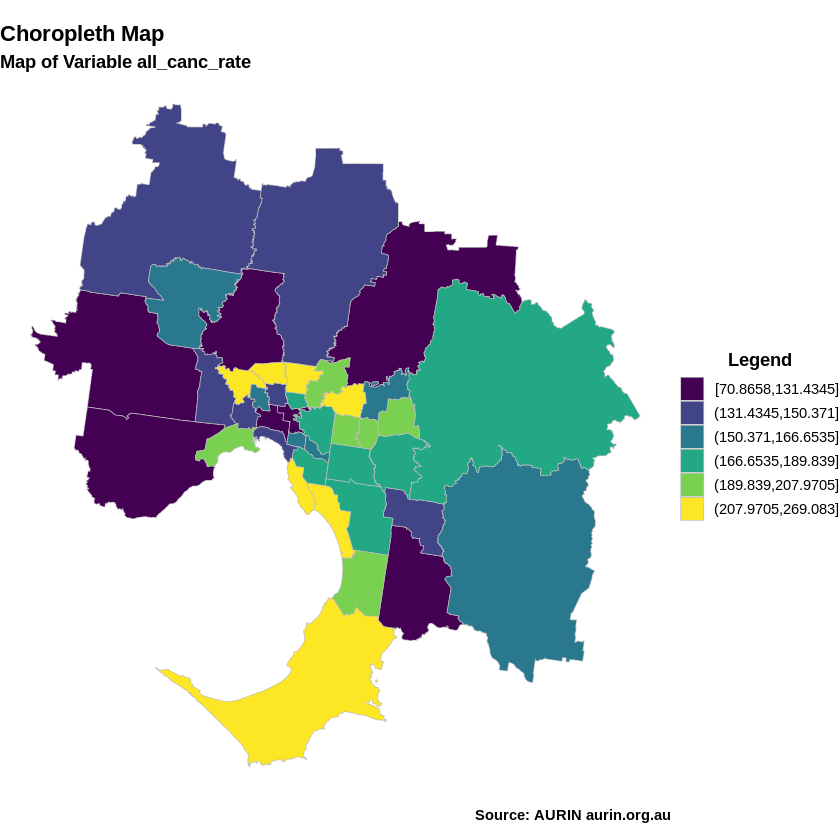

In [15]:
ggplot()+
  geom_sf(aes(fill=dataset.sf$choropleth_cat),colour='grey', size = 0.2, data=dataset.sf)+
  scale_fill_viridis_d(                                                        # Set the colour scheme here. See https://ggplot2.tidyverse.org/reference/scale_viridis.html
                         name='Legend',                                        # Set the title of the legend
                         guide=guide_legend(
                         direction='vertical',                                 # Set the orientation of the legend
                         title.position='top',                                 # Set the postion of the legend title
                         title.hjust = .5,                                     # Adjust horizontal postion of the legend title
                         label.hjust = .5,                                     # Adjust horizontal postion of the legend labels
                         label.position = 'right',                             # Position of labels Change to e.g. 'bottom'
                         keywidth = 1,                                         # Legend width
                         keyheight = 1                                         # Legend height
                       ))+
  labs(title="Choropleth Map",                                                 # Map title
       subtitle= paste('Map of Variable', variable.param),                     # Map subtitle
       caption=c('Source: AURIN aurin.org.au'))+                               # Caption
  theme_void()+
  theme(title=element_text(face='bold'),
        legend.position = 'right')                                             # Position of legend. Change to e.g. 'bottom'

## Save Result

In [16]:
ggsave("img/choropleth.png", plot = last_plot())

Saving 6.67 x 6.67 in image

